# **Question 1:** 
*Load the training and test data files and answer the following questions.*

Q1.i: How many training and test examples are there? You can use np.loadtxt for this purpose.
Show at least 10 randomly selected objects of each class using plt.matshow. 

In [ ]:
import numpy as np 

xTrainSet = np.loadtxt("Xtrain.csv")
yTrainSet = np.loadtxt("Ytrain.csv")
TestSet = np.loadtxt("Xtest.csv")
print("xTraining example:", len(xTrainSet))
print("yTraining example:", len(yTrainSet)) 
print("Testing example:", len(TestSet))


xTraining example: 3000
yTraining example: 3000
Testing example: 3000


In [ ]:
# generate 10 random integers

from random import seed
from random import randint

seed(1)

value = []
for i in range(10):
  value.append(randint(0, 3000))
print(value)


[550, 2331, 258, 1044, 482, 2029, 1841, 1934, 2668, 1554]


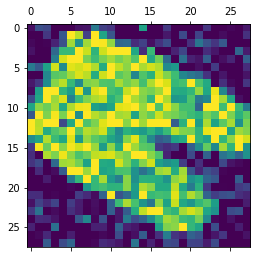

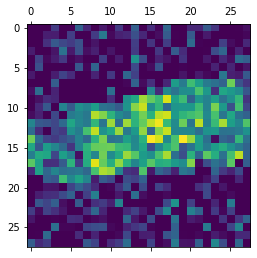

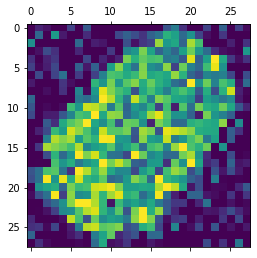

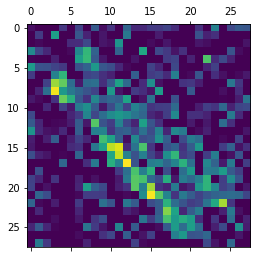

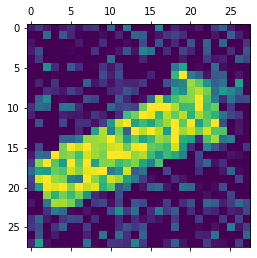

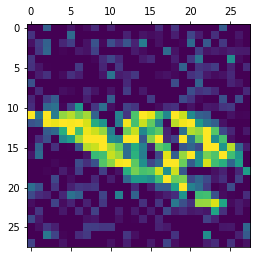

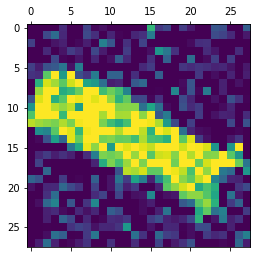

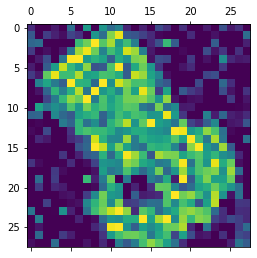

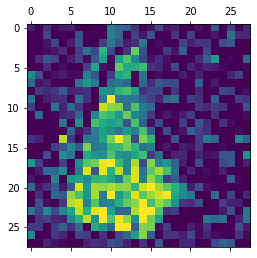

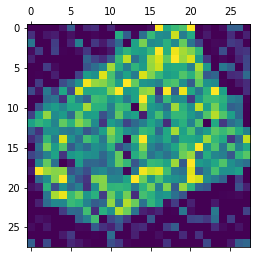

In [ ]:
import matplotlib.pyplot as plt

for i in value:
    plt.matshow(xTrainSet[i].reshape((28,28))) # plot the 10 random examples


A1.i: There are 3000 instances in the training set and 3000 instances in the test set. The 10 random example are shown as the above figures.

---



Q1.ii: How many positive and negative examples are there in the training dataset?

In [ ]:
pos = 0
neg = 0
for i in yTrainSet: # for loop for calculating the number of positive and negative examples
    if i > 0:
        pos += 1
    elif i < 0:
        neg += 1
print("Positive example:", pos, "Negative example:", neg)


Positive example: 2118 Negative example: 882


A1.ii: Positive example: 2118 Negative example: 882.

---



Q1.iii: Which performance metric (accuracy, AUC-ROC and AUC-PR) should be used? Give your 
reasoning. 

In [ ]:
print(pos/neg) # 2.4 : 1 class imbalance
print(pos/3000) # positive example proportion

2.401360544217687
0.706


A1.iii: AUC-ROC.
An receiver-operating curve (ROC) is plotting the True-Positive rate (TPR) against False-Positive rate (FPR).

*TPR = TP/(TP + FN), where FN indicating False-Negatives.*
*FPR = FP/(FP + TN), where TN indicating True-Negatives.*

Thus the area under the ROC curve (AUC-ROC) suggests that sensitivity for the model in discriminating classes. The higher the value, the better the performance of the model is.

A precision-recall curve is plotting the precision against recall.

*Precision = TP/(TP + FP);
Recall = TP/(TP + FN).*

Similarly, the precision recall area under curve (AUC-PR) is just the area under the PR curve. A high AUC-PR suggests the model is getting only the true positives with no false positives and no false negatives. The higher the value, the better the performance of the model is.

Since the training data is, to some extent, 2.4:1 class imbalanced. Specifically, the number of positive instances are 2.4 times as big as negative instances. Therefore, AUC-ROC might be a less biased performance evaluation metric since AUC-PR is more in favor or positive instances (does not account for TN)..  


---



Q1.iv: What is the expected accuracy of a random classifier (one that generates random labels for a 
given example) for this problem over the training and test datasets? Demonstrate why this 
would be the case.

A1.iv: The equation of the classification accuracy for a random classifier (Random guess) is as follows:

*Accuracy = 1/k (here k is the number of classes).* 

In this case, the value of k is 2.So, the classification accuracy of the random classifier in your case is 1/2 = 50%.

---



Q1.v: What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training 
and test datasets? Demonstrate why this would be the case.

A1.v: The AUC-ROC and AUC-PR of a random classifier are both 0.5.

For ROC:

*TPR = TP/(TP + FN), where TP & FN indicating True-Positives & False-Negatives.*
*FPR = FP/(FP + TN), where FP & TN indicating False-Positives & True-Negatives.*

TPR stands for the proportion of all the postive instances that are exactly classified as positive;

FPR represents the percentage of the negative instances that are mis-classified as positive;

In this case, if it is a random classifier, the possibility that we get a sample that is classified as either positive or negative should be equal. Since ROC is plotting the True-Positive rate (TPR) against False-Positive rate (FPR). Thus in this scenario, the ROC should be like *y (TPR) =x (FPR)*. Therefore, the AUC-ROC should be 0.5

For PR:

*Precision = TP/(TP + FP);
Recall = TP/(TP + FN).*

Starting from the same reasoning similar to ROC, if it is a random classifier, we should get equivalent Recall and Precision rates, and thus,AUC-PR = 0.5.

---



# **Question 2:**
*Perform 5-fold stratified cross-validation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) over the training dataset using the k = 1 nearest neighbour classifier and answer the following questions:*

Q2.i: What is the prediction accuracy, AUC-ROC and AUC-PR for each fold using this classifier?
Show code to demonstrate the results.


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
# from sklearn.feature_extraction.text import TfidfVectorizer


Accuracy = []
AUC_ROC = []
AUC_PR = []

skf = StratifiedKFold(n_splits = 5, shuffle = True)

for i,(tr_idx, tt_idx) in enumerate(skf.split(xTrainSet, yTrainSet)): # get indices for training and testing instances
  Xtr, Ytr, Xtt, Ytt = xTrainSet[tr_idx], yTrainSet[tr_idx], xTrainSet[tt_idx], yTrainSet[tt_idx]
  clf = KNeighborsClassifier(n_neighbors = 1) 
  clf.fit(Xtr, Ytr)
  Ypred = clf.predict(Xtt)
  acc = accuracy_score(Ytt, Ypred)
  Accuracy.append(acc)
  roc = roc_auc_score(Ytt, Ypred)
  AUC_ROC.append(roc)
  pr = average_precision_score(Ytt, Ypred)
  AUC_PR.append(pr)
  print("Fold", i, ": Accuracy: ", acc)
  print("Fold", i, ": AUC-ROC: ", roc)
  print("Fold", i, ": AUC-PR: ", pr)



Fold 0 : Accuracy:  0.76
Fold 0 : AUC-ROC:  0.7304888507718696
Fold 0 : AUC-PR:  0.8216037735849056
Fold 1 : Accuracy:  0.765
Fold 1 : AUC-ROC:  0.7456582332761579
Fold 1 : AUC-PR:  0.8311503451843947
Fold 2 : Accuracy:  0.7983333333333333
Fold 2 : AUC-ROC:  0.7692431389365352
Fold 2 : AUC-PR:  0.8441540188525473
Fold 3 : Accuracy:  0.7233333333333334
Fold 3 : AUC-ROC:  0.6871418840405499
Fold 3 : AUC-PR:  0.7957661588960581
Fold 4 : Accuracy:  0.7383333333333333
Fold 4 : AUC-ROC:  0.7092799615338382
Fold 4 : AUC-PR:  0.8084182957122799


A2.i: The answers of Fold 0-4 are shown as above.

---



Q2.ii: What is the mean and standard deviation of each performance metric (accuracy, AUC-ROC and AUC-PR) across all the folds for this classifier? Show code to demonstrate the 
results.




In [ ]:
def Stats(metrics): # the function to get means and standard deviations
  mean = np.mean(metrics)
  std = np.std(metrics)
  print(metrics, "\n", "Mean: ", mean, "\n", "Standard Deviation:", std)

print("Accuracy: ")
Stats(Accuracy)

print("AUC-ROC: ")
Stats(AUC_ROC)

print("AUC-PR: ")
Stats(AUC_PR)

Accuracy: 
[0.76, 0.765, 0.7983333333333333, 0.7233333333333334, 0.7383333333333333] 
 Mean:  0.757 
 Standard Deviation: 0.02554734167514629
AUC-ROC: 
[0.7304888507718696, 0.7456582332761579, 0.7692431389365352, 0.6871418840405499, 0.7092799615338382] 
 Mean:  0.7283624137117901 
 Standard Deviation: 0.028418912193735255
AUC-PR: 
[0.8216037735849056, 0.8311503451843947, 0.8441540188525473, 0.7957661588960581, 0.8084182957122799] 
 Mean:  0.8202185184460371 
 Standard Deviation: 0.01692037287694932


A2.ii: The answers are shown as above.

---



Q2.iii: What is the impact of various forms of pre-processing (https://scikit-learn.org/stable/modules/preprocessing.html ) on the cross-validation performance?
Show code to demonstrate the results.

In [ ]:
# Standardisation

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(xTrainSet)
STD_xTrainSet = scaler.transform(xTrainSet)

# print(skf)
# print(STD_xTrainSet[:5])
# plt.matshow(xTrainSet[1].reshape((28,28)))
# plt.matshow(STD_xTrainSet[1].reshape((28,28)))

STD_Accuracy = []
STD_AUC_ROC = []
STD_AUC_PR = []

for tr_idx, tt_idx in skf.split(STD_xTrainSet, yTrainSet):
  Xtr_s, Xtt_s = STD_xTrainSet[tr_idx], STD_xTrainSet[tt_idx]
  Ytr_s, Ytt_s = yTrainSet[tr_idx], yTrainSet[tt_idx]
  clf = KNeighborsClassifier(n_neighbors = 1) 
  clf.fit(Xtr_s, Ytr_s)
  Ypred_s = clf.predict(Xtt_s)
  acc_s = accuracy_score(Ytt_s, Ypred_s)
  STD_Accuracy.append(acc_s)
  roc_s = roc_auc_score(Ytt_s, Ypred_s)
  STD_AUC_ROC.append(roc_s)
  pr_s = average_precision_score(Ytt_s, Ypred_s)
  STD_AUC_PR.append(pr_s)

print("Accuracy after standardisation: ")
Stats(STD_Accuracy)

print("AUC-ROC after standardisation: ")
Stats(STD_AUC_ROC)

print("AUC-PR after standardisation: ")
Stats(STD_AUC_PR)


Accuracy after standardisation: 
[0.7483333333333333, 0.7716666666666666, 0.7666666666666667, 0.7416666666666667, 0.7483333333333333] 
 Mean:  0.7553333333333333 
 Standard Deviation: 0.011661903789690597
AUC-ROC after standardisation: 
[0.7205724699828473, 0.7370819039451114, 0.720250857632933, 0.7132868533878272, 0.7245862884160758] 
 Mean:  0.7231556746729588 
 Standard Deviation: 0.00785482093350907
AUC-PR after standardisation: 
[0.8160855027465966, 0.825010533437899, 0.8147531222987273, 0.8107177400967227, 0.8174601442686549] 
 Mean:  0.8168054085697201 
 Standard Deviation: 0.004680653879689592


In [ ]:
# MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
MinMax_xTrainSet = min_max_scaler.fit_transform(xTrainSet) # rescale the data

# print(MinMax_xTrainSet[:5])
# plt.matshow(xTrainSet[1].reshape((28,28)))
# plt.matshow(MinMax_xTrain[1].reshape((28,28)))

MinMax_Accuracy = []
MinMax_AUC_ROC = []
MinMax_AUC_PR = []

for tr_idx, tt_idx in skf.split(MinMax_xTrainSet, yTrainSet):
  Xtr_m, Xtt_m = MinMax_xTrainSet[tr_idx], MinMax_xTrainSet[tt_idx]
  Ytr_m, Ytt_m = yTrainSet[tr_idx], yTrainSet[tt_idx]
  clf = KNeighborsClassifier(n_neighbors = 1) 
  clf.fit(Xtr_m, Ytr_m)
  Ypred_m = clf.predict(Xtt_m)
  acc_m = accuracy_score(Ytt_m, Ypred_m)
  MinMax_Accuracy.append(acc_m)
  roc_m = roc_auc_score(Ytt_m, Ypred_m)
  MinMax_AUC_ROC.append(roc_m)
  pr_m = average_precision_score(Ytt_m, Ypred_m)
  MinMax_AUC_PR.append(pr_m)

print("Accuracy after scaling to range(0,1): ")
Stats(MinMax_Accuracy)

print("AUC-ROC after scaling to range(0,1): ")
Stats(MinMax_AUC_ROC)

print("AUC-PR after scaling to range(0,1): ")
Stats(MinMax_AUC_PR)



Accuracy after scaling to range(0,1): 
[0.7633333333333333, 0.745, 0.7533333333333333, 0.755, 0.735] 
 Mean:  0.7503333333333333 
 Standard Deviation: 0.009626352718795764
AUC-ROC after scaling to range(0,1): 
[0.7245390222984562, 0.7065823327615781, 0.7224485420240138, 0.7227431181632409, 0.7217013262812038] 
 Mean:  0.7196028683056985 
 Standard Deviation: 0.006576663531758141
AUC-PR after scaling to range(0,1): 
[0.8176136502411918, 0.8076128444052972, 0.816941823899371, 0.8158230125965915, 0.816567932137394] 
 Mean:  0.8149118526559691 
 Standard Deviation: 0.0036951001764531726


In [ ]:
# Normalisation

normalizer = preprocessing.Normalizer().fit(xTrainSet)
NORM_xTrainSet = normalizer.fit_transform(xTrainSet)

# print(NORM_xTrainSet[:5])
# plt.matshow(xTrainSet[1].reshape((28,28)))
# plt.matshow(NORM_xTrainSet[1].reshape((28,28)))

NORM_Accuracy = []
NORM_AUC_ROC = []
NORM_AUC_PR = []

for tr_idx, tt_idx in skf.split(NORM_xTrainSet, yTrainSet):
  Xtr_n, Xtt_n = NORM_xTrainSet[tr_idx], NORM_xTrainSet[tt_idx]
  Ytr_n, Ytt_n = yTrainSet[tr_idx], yTrainSet[tt_idx]
  clf = KNeighborsClassifier(n_neighbors = 1) 
  clf.fit(Xtr_n, Ytr_n)
  Ypred_n = clf.predict(Xtt_n)
  acc_n = accuracy_score(Ytt_n, Ypred_n)
  NORM_Accuracy.append(acc_n)
  roc_n = roc_auc_score(Ytt_n, Ypred_n)
  NORM_AUC_ROC.append(roc_n)
  pr_n = average_precision_score(Ytt_n, Ypred_n)
  NORM_AUC_PR.append(pr_n)

print("Accuracy after normalisation: ")
Stats(NORM_Accuracy)

print("AUC-ROC after normalisation: ")
Stats(NORM_AUC_ROC)

print("AUC-PR after normalisation: ")
Stats(NORM_AUC_PR)



Accuracy after normalisation: 
[0.765, 0.7633333333333333, 0.7566666666666667, 0.7783333333333333, 0.755] 
 Mean:  0.7636666666666667 
 Standard Deviation: 0.008259674462242567
AUC-ROC after normalisation: 
[0.7107632933104631, 0.6996140651801028, 0.7048670668953688, 0.7245061505789959, 0.7096005128821574] 
 Mean:  0.7098702177694175 
 Standard Deviation: 0.008310247149856856
AUC-PR after normalisation: 
[0.8090849129565585, 0.8025777625999602, 0.8059775002214545, 0.8154839254393133, 0.807659122015225] 
 Mean:  0.8081566446465022 
 Standard Deviation: 0.004258423416130219


In [ ]:
# Feature Binarisation

binarizer = preprocessing.Binarizer()
BINA_xTrainSet = binarizer.fit_transform(xTrainSet)

# print(BINA_xTrainSet[:5])
# plt.matshow(xTrainSet[1].reshape((28,28)))
# plt.matshow(BINA_xTrainSet[1].reshape((28,28)))

BINA_Accuracy = []
BINA_AUC_ROC = []
BINA_AUC_PR = []

for tr_idx, tt_idx in skf.split(BINA_xTrainSet, yTrainSet):
  Xtr_b, Xtt_b = BINA_xTrainSet[tr_idx], BINA_xTrainSet[tt_idx]
  Ytr_b, Ytt_b = yTrainSet[tr_idx], yTrainSet[tt_idx]
  clf = KNeighborsClassifier(n_neighbors = 1) 
  clf.fit(Xtr_b, Ytr_b)
  Ypred_b = clf.predict(Xtt_b)
  acc_b = accuracy_score(Ytt_b, Ypred_b)
  BINA_Accuracy.append(acc_b)
  roc_b = roc_auc_score(Ytt_b, Ypred_b)
  BINA_AUC_ROC.append(roc_b)
  pr_b = average_precision_score(Ytt_b, Ypred_b)
  BINA_AUC_PR.append(pr_b)

print("Accuracy after feature binarisation: ")
Stats(BINA_Accuracy)

print("AUC-ROC after feature binarisation: ")
Stats(BINA_AUC_ROC)

print("AUC-PR after feature binarisation: ")
Stats(BINA_AUC_PR)


Accuracy after feature binarisation: 
[0.5916666666666667, 0.6166666666666667, 0.5766666666666667, 0.59, 0.62] 
 Mean:  0.599 
 Standard Deviation: 0.01665332799572907
AUC-ROC after feature binarisation: 
[0.5266402229845626, 0.5542988850771869, 0.4994103773584906, 0.533437512521537, 0.5333573746844573] 
 Mean:  0.5294288745252469 
 Standard Deviation: 0.017657329733035763
AUC-PR after feature binarisation: 
[0.7179693847143149, 0.7302427766361541, 0.7064223453623986, 0.7193293851614034, 0.7192516507703596] 
 Mean:  0.7186431085289262 
 Standard Deviation: 0.007552410947829393


A2.iii: Data pre-processing can, to some extent, slightly improve the level of Accuracy, AUC-ROC, AUC-PR performance metrics, such as normalisation in this case. However, some processes that are expected to improve the model performance contribute little or nothing to it under this circumstance (e.g., standardisation, Min-max Scaler). Yet some of the pre-processing technique (i.e., feature binarisation, impairs the model performance.

---



Q2.iv: Use 5-fold cross-validation over training data to calculate the optimal value of k for the 
k-Nearest neighbour classifier. What is the optimal value of k and what are the crossvalidation accuracy, AUC-ROC and AUC-PR? Show code to demonstrate the results.

In [ ]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,31)) # Specify the n neighbors.
weight_options = ['uniform', 'distance'] # Weight function used in prediction. 
# Possible values:‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.‘
# distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

param_grid_kNN = {'weights': weight_options, 'n_neighbors': k_range} # the parameter grid
 
kNN = KNeighborsClassifier() # build the classifier


In [ ]:
# for finding optimal parameters by Accuracy

grid_search_kNN = GridSearchCV(kNN, param_grid_kNN, n_jobs = -1, cv = skf) # default setting: scoring = 'accuracy'
grid_search_kNN.fit(NORM_xTrainSet, yTrainSet)

kNN_BS = grid_search_kNN.best_score_
kNN_BP = grid_search_kNN.best_params_
kNN_BE = grid_search_kNN.best_estimator_

print('Accuracy:')
print(kNN_BS)
print('Parameters:')
print(kNN_BP)
print(kNN_BE)


Accuracy:
0.7816666666666666
Parameters:
{'n_neighbors': 8, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=8, weights='distance')


In [ ]:
# for finding optimal parameters by AUC-ROC

grid_search_roc = GridSearchCV(kNN, param_grid_kNN, n_jobs = -1, scoring = 'roc_auc', cv = skf)
 
grid_search_roc.fit(NORM_xTrainSet, yTrainSet)

kNN_ROC_BS = grid_search_roc.best_score_
kNN_ROC_BP = grid_search_roc.best_params_
kNN_ROC_BE = grid_search_roc.best_estimator_

print('AUC-ROC:')
print(kNN_ROC_BS)
print('Parameters:')
print(kNN_ROC_BP)
print(kNN_ROC_BE)


AUC-ROC:
0.8080308188868444
Parameters:
{'n_neighbors': 7, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=7, weights='distance')


In [ ]:
# for finding optimal parameters by AUC-PR

grid_search_pr = GridSearchCV(kNN, param_grid_kNN, n_jobs = -1, scoring = 'average_precision', cv = skf)
 
grid_search_pr.fit(NORM_xTrainSet, yTrainSet)

kNN_PR_BS = grid_search_pr.best_score_
kNN_PR_BP = grid_search_pr.best_params_
kNN_PR_BE = grid_search_pr.best_estimator_

print('AUC-PR:')
print(kNN_PR_BS)
print('Parameters:')
print(kNN_PR_BP)
print(kNN_PR_BE)


AUC-PR:
0.9017726635846689
Parameters:
{'n_neighbors': 9, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=9, weights='distance')


A2.iv: The results of best Accuracy, AUC-ROC, AUC-PR scores alongside with optimal parameters (k neighbors, weights) are shown as output of the above 3 blocks.

---



# **Question 3**

***Use 5-fold stratified cross-validation over training data to choose an optimal classifier 
between: k-nearest neighbour, Perceptron, Naïve Bayes Classifier, Logistic regression, 
Linear SVM and Kernelized SVM.***

*Be sure to tune the hyperparameters of each classifier 
type (k for k-nearest neighbour, C and kernel type and parameters for SVM and so on).* 

***Report the cross validation results (mean and standard deviation of accuracy, AUC-ROC 
and AUC-PR across fold) of your best model.*** 

*You may look into grid search as well as 
ways of pre-processing data.* 

***Show code to demonstrate the results. Also show the 
comparison of these classifiers using a single table.***

In [ ]:
# k-nearest neighbor, k = 6 (optimal k as calculated from the best AUC-ROC score)

kNN_Accuracy = []
kNN_AUC_ROC = []
kNN_AUC_PR = []

skf = StratifiedKFold(n_splits = 5, shuffle = True)

for tr_idx, tt_idx in skf.split(NORM_xTrainSet, yTrainSet): 
  Xtr, Xtt = NORM_xTrainSet[tr_idx], NORM_xTrainSet[tt_idx]
  Ytr, Ytt = yTrainSet[tr_idx], yTrainSet[tt_idx]
  kNN = KNeighborsClassifier(n_neighbors = 8, weights = 'distance') 
  kNN.fit(Xtr, Ytr)
  Ypred_kNN = kNN.predict(Xtt)

  acc_knn = accuracy_score(Ytt, Ypred_kNN)
  kNN_Accuracy.append(acc_knn)
  roc_knn = roc_auc_score(Ytt, Ypred_kNN)
  kNN_AUC_ROC.append(roc_knn)
  pr_knn = average_precision_score(Ytt, Ypred_kNN)
  kNN_AUC_PR.append(pr_knn)

print("Accuracy for kNN, k = 6: ")
Stats(kNN_Accuracy)

print("AUC-ROC for kNN, k = 6: ")
Stats(kNN_AUC_ROC)

print("AUC-PR for kNN, k = 6: ")
Stats(kNN_AUC_PR)

Accuracy for kNN, k = 6: 
[0.7583333333333333, 0.79, 0.7666666666666667, 0.7933333333333333, 0.775] 
 Mean:  0.7766666666666666 
 Standard Deviation: 0.013374935098492594
AUC-ROC for kNN, k = 6: 
[0.64954974271012, 0.6819253859348199, 0.6554459691252144, 0.7105020635493048, 0.6662860119405377] 
 Mean:  0.6727418346519993 
 Standard Deviation: 0.02185804309806408
AUC-PR for kNN, k = 6: 
[0.775260148656375, 0.7917101405697963, 0.7781635220125787, 0.8063525157562763, 0.7823096926713948] 
 Mean:  0.7867592039332842 
 Standard Deviation: 0.011263408118192262


In [ ]:
# grid search for optimal Perceptron parameters

from sklearn.linear_model import Perceptron

alpha = [] # Constant that multiplies the regularization term if regularization is used
for i in range(-1,21,1):
  j = 10**(-i)
  alpha.append(j)
  i += 1
penalty_PCT = ['l2', 'l1'] # The penalty (aka regularization term) to be used.
param_grid_PCT = {'alpha': alpha, 'penalty': penalty_PCT} # create grid dict for tuning parameters
perceptron = Perceptron()

grid_search_PCT = GridSearchCV(perceptron, param_grid_PCT, n_jobs = -1, cv = skf)

grid_search_PCT.fit(NORM_xTrainSet, yTrainSet)

PCT_BS = grid_search_PCT.best_score_
PCT_BP = grid_search_PCT.best_params_
PCT_BE = grid_search_PCT.best_estimator_

print('Accuracy for Perceptron:')
print(PCT_BS)
print('Parameters:')
print(PCT_BP)
print('Estimators: ')
print(PCT_BE)


Accuracy for Perceptron:
0.6916666666666667
Parameters:
{'alpha': 1e-09, 'penalty': 'l1'}
Estimators: 
Perceptron(alpha=1e-09, penalty='l1')


In [ ]:
# Optimal Perceptron

from sklearn.linear_model import Perceptron

PCT_Accuracy = []
PCT_AUC_ROC = []
PCT_AUC_PR = []

for tr_idx, tt_idx in skf.split(NORM_xTrainSet, yTrainSet): 
  Xtr, Xtt = NORM_xTrainSet[tr_idx], NORM_xTrainSet[tt_idx]
  Ytr, Ytt = yTrainSet[tr_idx], yTrainSet[tt_idx]
  PCT = Perceptron(alpha=1e-09, penalty='l1')
  PCT.fit(Xtr, Ytr)
  Ypred_PCT = PCT.predict(Xtt)
  
  acc_pct = accuracy_score(Ytt, Ypred_PCT)
  PCT_Accuracy.append(acc_pct)
  roc_pct = roc_auc_score(Ytt, Ypred_PCT)
  PCT_AUC_ROC.append(roc_pct)
  pr_pct = average_precision_score(Ytt, Ypred_PCT)
  PCT_AUC_PR.append(pr_pct)

print("Accuracy for Perceptron: ")
Stats(PCT_Accuracy)

print("AUC-ROC for Perceptron: ")
Stats(PCT_AUC_ROC)

print("AUC-PR for Perceptron: ")
Stats(PCT_AUC_PR)

Accuracy for Perceptron: 
[0.6016666666666667, 0.7, 0.6416666666666667, 0.7, 0.6266666666666667] 
 Mean:  0.6540000000000001 
 Standard Deviation: 0.03967366884975471
AUC-ROC for Perceptron: 
[0.5370390222984562, 0.5069146655231561, 0.5354309605488851, 0.4997395520294907, 0.5676563689546019] 
 Mean:  0.5293561138709181 
 Standard Deviation: 0.024263551771306496
AUC-PR for Perceptron: 
[0.7225190005774303, 0.7095453219218051, 0.7217512259396607, 0.7048916835101399, 0.7348141304284064] 
 Mean:  0.7187042724754884 
 Standard Deviation: 0.010564445923362527


In [ ]:
# grid search for optimal Gaussian Naive Bayes parameters

from sklearn.naive_bayes import GaussianNB

var_smoothing = np.logspace(0, -9, num = 200) # Portion of the largest variance of all features that is added to variances for calculation stability.
param_grid_NB ={'var_smoothing' : var_smoothing}
NB = GaussianNB()

grid_search_NB = GridSearchCV(NB, param_grid_NB, cv = skf)
grid_search_NB.fit(NORM_xTrainSet, yTrainSet)

NB_BS = grid_search_NB.best_score_
NB_BP = grid_search_NB.best_params_
NB_BE = grid_search_NB.best_estimator_

print("Accuracy for Naive Bayes: ")
print(NB_BS)
print('Parameters: ')
print(NB_BP)
print('Estimators: ')
print(NB_BE)


Accuracy for Naive Bayes: 
0.5443333333333333
Parameters: 
{'var_smoothing': 0.00014314589375234786}
Estimators: 
GaussianNB(var_smoothing=0.00014314589375234786)


In [ ]:
# Optimal Naive Bayes

from sklearn.naive_bayes import GaussianNB

NB_Accuracy = []
NB_AUC_ROC = []
NB_AUC_PR = []

for tr_idx, tt_idx in skf.split(NORM_xTrainSet, yTrainSet): 
  Xtr, Xtt = NORM_xTrainSet[tr_idx], NORM_xTrainSet[tt_idx]
  Ytr, Ytt = yTrainSet[tr_idx], yTrainSet[tt_idx]
  NB = GaussianNB(var_smoothing=0.00014314589375234786)
  NB.fit(Xtr, Ytr)
  Ypred_NB = NB.predict(Xtt)
  
  acc_nb = accuracy_score(Ytt, Ypred_NB)
  NB_Accuracy.append(acc_nb)
  roc_nb = roc_auc_score(Ytt, Ypred_NB)
  NB_AUC_ROC.append(roc_nb)
  pr_nb = average_precision_score(Ytt, Ypred_NB)
  NB_AUC_PR.append(pr_nb)

print("Accuracy for Naive Bayes: ")
Stats(NB_Accuracy)

print("AUC-ROC for Naive Bayes: ")
Stats(NB_AUC_ROC)

print("AUC-PR for Naive Bayes: ")
Stats(NB_AUC_PR)

Accuracy for Naive Bayes: 
[0.5583333333333333, 0.5366666666666666, 0.5516666666666666, 0.55, 0.54] 
 Mean:  0.5473333333333332 
 Standard Deviation: 0.00793025150224689
AUC-ROC for Naive Bayes: 
[0.5778301886792453, 0.5541916809605489, 0.5697898799313893, 0.5576391393196297, 0.5505469407380695] 
 Mean:  0.5619995659257765 
 Standard Deviation: 0.01022190413354195
AUC-PR for Naive Bayes: 
[0.7419710821500357, 0.7306213967505242, 0.7380425338779745, 0.7305894951197247, 0.7272917114406476] 
 Mean:  0.7337032438677813 
 Standard Deviation: 0.005431160992613464


In [ ]:
# grid search for optimal Logistic Regression parameters

from sklearn.linear_model import LogisticRegression

# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty_LR = ['l2', 'l1'] # Specify the norm of the penalty
c_values_LR = [] # Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
for i in range(-2,5):
  j = 10**(-i)
  c_values_LR.append(j)
  i += 1
param_grid_LR = {'penalty': penalty_LR, 'C': c_values_LR}

LR = LogisticRegression()

grid_search_LR = GridSearchCV(LR, param_grid_LR, n_jobs = -1, cv = skf)
grid_search_LR.fit(NORM_xTrainSet, yTrainSet)

LR_BS = grid_search_LR.best_score_
LR_BP = grid_search_LR.best_params_
LR_BE = grid_search_LR.best_estimator_

print("Accuracy for Logistic Regression: ")
print(LR_BS)
print('Parameters: ')
print(LR_BP)
print('Estimators: ')
print(LR_BE)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Accuracy for Logistic Regression: 
0.7066666666666668
Parameters: 
{'C': 1, 'penalty': 'l2'}
Estimators: 
LogisticRegression(C=1)


In [ ]:
# Optimal Logistic Regression

from sklearn.linear_model import LogisticRegression

LR_Accuracy = []
LR_AUC_ROC = []
LR_AUC_PR = []

for tr_idx, tt_idx in skf.split(NORM_xTrainSet, yTrainSet): 
  Xtr, Xtt = NORM_xTrainSet[tr_idx], NORM_xTrainSet[tt_idx]
  Ytr, Ytt = yTrainSet[tr_idx], yTrainSet[tt_idx]
  LR = LogisticRegression(C=1)
  LR.fit(Xtr, Ytr)
  Ypred_LR = LR.predict(Xtt)
  
  acc_lr = accuracy_score(Ytt, Ypred_LR)
  LR_Accuracy.append(acc_lr)
  roc_lr = roc_auc_score(Ytt, Ypred_LR)
  LR_AUC_ROC.append(roc_lr)
  pr_lr = average_precision_score(Ytt, Ypred_LR)
  LR_AUC_PR.append(pr_lr)

print("Accuracy for Logistic Regression: ")
Stats(LR_Accuracy)

print("AUC-ROC for Logistic Regression: ")
Stats(LR_AUC_ROC)

print("AUC-PR for Logistic Regression: ")
Stats(LR_AUC_PR)


Accuracy for Logistic Regression: 
[0.7116666666666667, 0.71, 0.71, 0.7066666666666667, 0.7033333333333334] 
 Mean:  0.7083333333333334 
 Standard Deviation: 0.0029814239699997016
AUC-ROC for Logistic Regression: 
[0.5085227272727273, 0.5073434819897085, 0.5056818181818181, 0.5044676844171976, 0.4988179669030733] 
 Mean:  0.5049667357529051 
 Standard Deviation: 0.003372291560576576
AUC-PR for Logistic Regression: 
[0.7102177554438861, 0.7097243151407707, 0.7090301003344481, 0.7068632563922845, 0.7045086767938684] 
 Mean:  0.7080688208210516 
 Standard Deviation: 0.002117104194172388


In [ ]:
# grid search for optimal Linear SVM parameters

from sklearn.svm import LinearSVC

penalty_LSVM = ['l1', 'l2']
tolerance = [] # Tolerance for stopping criteria.
for i in range(-1,4):
  j = 10**(-i)
  tolerance.append(j)
  i += 1
C_LSVM = [] # Cfloat, default=1.0. Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
for i in range(2,7):
  j = 10**(-i)
  C_LSVM.append(j)
  i += 1
param_grid_LSVM = {'tol': tolerance, 'C': C_LSVM, 'penalty': penalty_LSVM}

LSVM = LinearSVC()
grid_search_LSVM = GridSearchCV(LSVM, param_grid_LSVM, cv = skf)
grid_search_LSVM.fit(NORM_xTrainSet, yTrainSet)

LSVM_BS = grid_search_LSVM.best_score_
LSVM_BP = grid_search_LSVM.best_params_
LSVM_BE = grid_search_LSVM.best_estimator_

print("Accuracy for Linear SVM: ")
print(LSVM_BS)
print('Parameters: ')
print(LSVM_BP)
print('Estimators: ')
print(LSVM_BE)

Accuracy for Linear SVM: 
0.7060000000000001
Parameters: 
{'C': 0.01, 'penalty': 'l2', 'tol': 10}
Estimators: 
LinearSVC(C=0.01, tol=10)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_classes.py", line 272, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/usr/l

In [ ]:
# fitting on the original training dataset, since fitting on the normalised dataset is clearly problematic.

grid_search_LSVM = GridSearchCV(LSVM, param_grid_LSVM, cv = skf)
grid_search_LSVM.fit(xTrainSet, yTrainSet)

LSVM_BS = grid_search_LSVM.best_score_
LSVM_BP = grid_search_LSVM.best_params_
LSVM_BE = grid_search_LSVM.best_estimator_

print("Accuracy for Linear SVM: ")
print(LSVM_BS)
print('Parameters: ')
print(LSVM_BP)
print('Estimators: ')
print(LSVM_BE)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Accuracy for Linear SVM: 
0.639
Parameters: 
{'C': 0.0001, 'penalty': 'l2', 'tol': 0.1}
Estimators: 
LinearSVC(C=0.0001, tol=0.1)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Optimal Linear SVM, this time fit on the original dataset as fitting on the normalised on the clearly problematic.

from sklearn.svm import LinearSVC

LSVM_Accuracy = []
LSVM_AUC_ROC = []
LSVM_AUC_PR = []

for tr_idx, tt_idx in skf.split(xTrainSet, yTrainSet): 
  Xtr, Xtt = xTrainSet[tr_idx], xTrainSet[tt_idx]
  Ytr, Ytt = yTrainSet[tr_idx], yTrainSet[tt_idx]
  LSVM = LinearSVC(C=0.0001, tol=0.1)
  LSVM.fit(Xtr, Ytr)
  Ypred_LSVM = LSVM.predict(Xtt)
  
  acc_lsvm = accuracy_score(Ytt, Ypred_LSVM)
  LSVM_Accuracy.append(acc_lsvm)
  roc_lsvm = roc_auc_score(Ytt, Ypred_LSVM)
  LSVM_AUC_ROC.append(roc_lsvm)
  pr_lsvm = average_precision_score(Ytt, Ypred_LSVM)
  LSVM_AUC_PR.append(pr_lsvm)

print("Accuracy for Linear SVM: ")
Stats(LSVM_Accuracy)

print("AUC-ROC for Linear SVM: ")
Stats(LSVM_AUC_ROC)

print("AUC-PR for Linear SVM: ")
Stats(LSVM_AUC_PR)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Accuracy for Linear SVM: 
[0.6266666666666667, 0.57, 0.61, 0.6166666666666667, 0.6416666666666667] 
 Mean:  0.613 
 Standard Deviation: 0.024000000000000035
AUC-ROC for Linear SVM: 
[0.5298027444253859, 0.5246033447684392, 0.5097019725557461, 0.5129222262291141, 0.5339383740032857] 
 Mean:  0.5221937323963941 
 Standard Deviation: 0.009419605011267939
AUC-PR for Linear SVM: 
[0.7193115453728661, 0.7171041286264963, 0.7107195502021564, 0.7104290390460604, 0.7194806156718311] 
 Mean:  0.7154089757838821 
 Standard Deviation: 0.004036640339021384


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# grid search for optimal Kernelised SVM parameters

from sklearn.svm import SVC

C_KSVM = [] # Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. 
for i in range(-2, 4):
  j = 10**(-i)
  C_KSVM.append(j)
  i += 1
gamma = [] # Defines how far influences the calculation of plausible line of separation. When gamma is higher, nearby points will have high influence
for i in range(0, 6):
  j = 10**(-i)
  gamma.append(j)
  i += 1
kernel = ['rbf', 'poly', 'sigmoid'] # he main function of the kernel is to take low dimensional input space and transform it into a higher-dimensional space.
param_grid_KSVM = {'C': C_KSVM, 'gamma': gamma, 'kernel': kernel}

KSVM = SVC()
grid_search_KSVM = GridSearchCV(KSVM, param_grid_KSVM, cv = skf)
grid_search_KSVM.fit(NORM_xTrainSet, yTrainSet)

KSVM_BS = grid_search_KSVM.best_score_
KSVM_BP = grid_search_KSVM.best_params_
KSVM_BE = grid_search_KSVM.best_estimator_

print("Accuracy for Kernelised SVM: ")
print(KSVM_BS)
print('Parameters: ')
print(KSVM_BP)
print('Estimators: ')
print(KSVM_BE)

Accuracy for Kernelised SVM: 
0.7376666666666667
Parameters: 
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Estimators: 
SVC(C=10, gamma=1)


In [ ]:
# Optimal Kernelised SVM

KSVM_Accuracy = []
KSVM_AUC_ROC = []
KSVM_AUC_PR = []

for tr_idx, tt_idx in skf.split(NORM_xTrainSet, yTrainSet): 
  Xtr, Xtt = NORM_xTrainSet[tr_idx], NORM_xTrainSet[tt_idx]
  Ytr, Ytt = yTrainSet[tr_idx], yTrainSet[tt_idx]
  KSVM = SVC(C=10, gamma=1, kernel='poly')
  KSVM.fit(Xtr, Ytr)
  Ypred_KSVM = KSVM.predict(Xtt)
  
  acc_ksvm = accuracy_score(Ytt, Ypred_KSVM)
  KSVM_Accuracy.append(acc_ksvm)
  roc_ksvm = roc_auc_score(Ytt, Ypred_KSVM)
  KSVM_AUC_ROC.append(roc_ksvm)
  pr_ksvm = average_precision_score(Ytt, Ypred_KSVM)
  KSVM_AUC_PR.append(pr_ksvm)

print("Accuracy for Kernelised SVM: ")
Stats(KSVM_Accuracy)

print("AUC-ROC for Kernelised SVM: ")
Stats(KSVM_AUC_ROC)

print("AUC-PR for Kernelised SVM: ")
Stats(KSVM_AUC_PR)

Accuracy for Kernelised SVM: 
[0.7183333333333334, 0.7166666666666667, 0.7516666666666667, 0.725, 0.75] 
 Mean:  0.7323333333333333 
 Standard Deviation: 0.015369522511198008
AUC-ROC for Kernelised SVM: 
[0.6362028301886793, 0.6283769296740995, 0.6830510291595198, 0.6439676243138197, 0.6567696437873143] 
 Mean:  0.6496736114246866 
 Standard Deviation: 0.019141444979627577
AUC-PR for Kernelised SVM: 
[0.7691095006039402, 0.7651172409078479, 0.7935439191576568, 0.7716056383499443, 0.7778269254697027] 
 Mean:  0.7754406448978184 
 Standard Deviation: 0.009947725439787326


A3: The table displays the mean of performance metrics of each classification model (numbers in the brackets indication standard deviations). Taken to all, k-nearest neighbors classification model seems to did a slightly better job by comparing to other models, though the level of kNN metrcis is relatively poor in general.

  \begin{array}{ccccccc}\hline
   & kNN & Perceptron & NaiveBayes & LogisticRegression & LinearSVM & KernelisedSVM\\
   \hline
  \text{Accuracy} & \text{0.7756(0.01)} & \text{0.6540(0.04)} & \text{0.5473(0.01)} & \text{0.7083(0.002)} & \text{0.613(0.02)} & \text{0.7323(0.02)}\\
  \text{AUC-ROC} & \text{0.6827(0.01)} & \text{0.5294(0.02)} & \text{0.5619(0.01)} & \text{0.5050(0.003)} & \text{0.5222(0.01)} & \text{0.6497(0.02)}\\
  \text{AUC-PR} & \text{0.7920(0.01)} & \text{0.7187(0.01)} & \text{0.7337(0.01)} & \text{0.7081(0.002)} & \text{0.7154(0.004)} & \text{0.7754(0.01)}\\
  \hline 
  \end{array}

---



# **Question 4**

*PCA*

Q4.i: Reduce the number of dimensions of the data using PCA to 2 and plot a scatter plot of 
the training data. What are your observations about the data based on data?

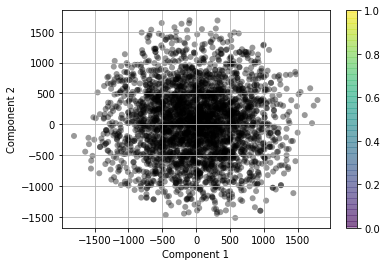

In [ ]:
# PCA to reduce to 2 dimensions on normalised data

from sklearn.decomposition import PCA

PCA_2components = PCA(n_components = 2)
PCA_2components.fit(NORM_xTrainSet)

projected = PCA_2components.transform(xTrainSet) 
pc1 = 0 # first principal component
pc2 = 1 # second principal component
plt.scatter(projected[:, pc1], projected[:, pc2],
            edgecolor='none', alpha=0.4, c='black',
            cmap = plt.cm.get_cmap('Accent', 10));

plt.grid()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();
plt.show()

A4.i: The black dots (darker ones) in the foreground represent one of the pricipal components, while the background ones stand for the other. The darker ones are more clustered, thus it might be more likely to be classified. Yet we can see that setting PCA dimensions = 2 does not successfully separate the pricipal components, as these 2 components largely overlap with one another.

---



Q4.ii: Plot the scree graph of PCA and find the number of dimensions that explain 95% 
variance in the training set. 

(3000, 784)
(3000, 506)


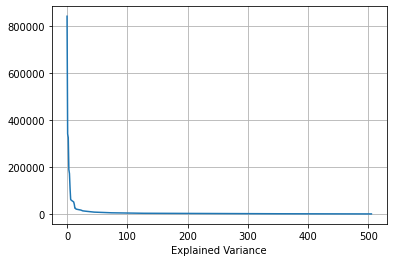

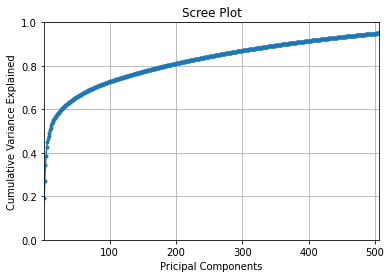

In [ ]:
# PCA to find the dimension that explain 95% variance of the normalised training data 

PCA_95perc = PCA(n_components = 0.95)
PCA_95perc.fit(xTrainSet)

projected_95perc = PCA_95perc.transform(NORM_xTrainSet)
print(xTrainSet.shape)
print(projected_95perc.shape) # set to 95% of variance

plt.plot(PCA_95perc.explained_variance_); plt.grid();
plt.xlabel('Explained Variance')
plt.figure()

plt.plot(np.arange(len(PCA_95perc.explained_variance_ratio_)) + 1, np.cumsum(PCA_95perc.explained_variance_ratio_), '.-' ) # scree plot
plt.axis([1, len(PCA_95perc.explained_variance_ratio_), 0, 1])
plt.xlabel('Pricipal Components')
plt.ylabel('Cumulative Variance Explained');
plt.title('Scree Plot')
plt.grid()
plt.show()

A4.ii: The number of dimensions is 506.

---



Q4.iii: Reduce the number of dimensions of the data using PCA and perform classification. 
What is the (optimal) cross-validation performance of a Kernelized SVM classification 
with PCA? Remember to perform hyperparameter optimization!


In [ ]:
# kernelised SVM of data after PCA (95% variance)

C_KSVM_PCA = []
for i in range(-2, 4):
  j = 10**(-i)
  C_KSVM_PCA.append(j)
  i += 1
gamma_PCA = []
for i in range(0, 6):
  j = 10**(-i)
  gamma_PCA.append(j)
  i += 1
kernel_PCA = ['rbf', 'poly', 'sigmoid']
param_grid_KSVM = {'C': C_KSVM_PCA, 'gamma': gamma_PCA, 'kernel': kernel_PCA}

PCA_KSVM = SVC() 

grid_search = GridSearchCV(PCA_KSVM, param_grid_KSVM, cv = skf)

grid_search.fit(projected_95perc, yTrainSet)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

In [ ]:
# Optimal Kernelised SVM using data after 95% PCA

from sklearn.svm import SVC

PCA_KSVM_Accuracy = []
PCA_KSVM_AUC_ROC = []
PCA_KSVM_AUC_PR = []

for tr_idx, tt_idx in skf.split(projected_95perc, yTrainSet): 
  Xtr, Xtt = projected_95perc[tr_idx], projected_95perc[tt_idx]
  Ytr, Ytt = yTrainSet[tr_idx], yTrainSet[tt_idx]
  PCA_KSVM = SVC(C=100, gamma=1, kernel='poly')
  PCA_KSVM.fit(Xtr, Ytr)
  Ypred_KSVM_PCA = PCA_KSVM.predict(Xtt)
  
  acc_ksvm_pca = accuracy_score(Ytt, Ypred_KSVM_PCA)
  PCA_KSVM_Accuracy.append(acc_ksvm_pca)
  roc_ksvm_pca = roc_auc_score(Ytt, Ypred_KSVM_PCA)
  PCA_KSVM_AUC_ROC.append(roc_ksvm_pca)
  pr_ksvm_pca = average_precision_score(Ytt, Ypred_KSVM_PCA)
  PCA_KSVM_AUC_PR.append(pr_ksvm_pca)

print("Accuracy for Kernelised SVM: ")
Stats(PCA_KSVM_Accuracy)

print("AUC-ROC for Kernelised SVM: ")
Stats(PCA_KSVM_AUC_ROC)

print("AUC-PR for Kernelised SVM: ")
Stats(PCA_KSVM_AUC_PR)

A4.iii: The answers are shown as the output of the above block (Note that the estimator that I have got was from the 1st round running of the above block, but somehow got lost after colab refreshing, the accuracy of this block that I vaguely remember is about 0.77).



---



In [ ]:
# try out kNN

from sklearn.neighbors import KNeighborsClassifier

PCA_KNN_Accuracy = []
PCA_KNN_AUC_ROC = []
PCA_KNN_AUC_PR = []

for tr_idx, tt_idx in skf.split(projected_95perc, yTrainSet): 
  Xtr, Xtt = projected_95perc[tr_idx], projected_95perc[tt_idx]
  Ytr, Ytt = yTrainSet[tr_idx], yTrainSet[tt_idx]
  PCA_KNN = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
  PCA_KNN.fit(Xtr, Ytr)
  Ypred_KNN_PCA = PCA_KNN.predict(Xtt)
  
  acc_knn_pca = accuracy_score(Ytt, Ypred_KNN_PCA)
  PCA_KNN_Accuracy.append(acc_knn_pca)
  roc_knn_pca = roc_auc_score(Ytt, Ypred_KNN_PCA)
  PCA_KNN_AUC_ROC.append(roc_knn_pca)
  pr_knn_pca = average_precision_score(Ytt, Ypred_KNN_PCA)
  PCA_KNN_AUC_PR.append(pr_knn_pca)

print("Accuracy for kNN: ")
Stats(PCA_KNN_Accuracy)

print("AUC-ROC for kNN: ")
Stats(PCA_KNN_AUC_ROC)

print("AUC-PR for kNN: ")
Stats(PCA_KNN_AUC_PR)

Accuracy for kNN: 
[0.8, 0.775, 0.7933333333333333, 0.76, 0.775] 
 Mean:  0.7806666666666667 
 Standard Deviation: 0.014321700705960562
AUC-ROC for kNN: 
[0.7238957975986279, 0.6962371355060034, 0.7158554888507718, 0.6589333653884681, 0.674500140241215] 
 Mean:  0.6938843855170174 
 Standard Deviation: 0.024438790650456278
AUC-PR for kNN: 
[0.815187262126488, 0.8001597457109092, 0.8107466866412935, 0.7787457342440085, 0.7867337289525739] 
 Mean:  0.7983146315350547 
 Standard Deviation: 0.0138542783960327


# **Question 5**

*Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any 
tools at your disposal. However, no external data sources may be used.* 

*Describe your pipeline and 
report your results over the test data set. (You are required to submit your prediction file together 
with the assignment in a zip folder).* 

*Your prediction file should be a single column file containing the 
prediction score of the corresponding example in Xtest (be sure to have the same order!). Your 
prediction file should be named by your student ID, e.g., u100011.csv.*

In [ ]:
from sklearn.pipeline import Pipeline

normalizer = preprocessing.Normalizer()
pipe_clf = Pipeline([('nm', normalizer), ('pca', PCA(n_components=506)), ('kNN', KNeighborsClassifier(n_neighbors=8,weights="distance"))])
pipe_clf.fit(xTrainSet, yTrainSet)
yPredict=pipe_clf.predict(TestSet)
np.savetxt("u2138473.csv", yPredict, fmt = '%i')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
